Your first task is parsing. As this is the first assignment and as the parsers are very different for the two datasets (images vs. text), you may use any library/package to aid in the parsing here, however you are encouraged to write your own.

In [9]:
#FIRST: PARSING
%pip install scikit-learn
%pip install torch
%pip install torchvision
import sklearn
import pandas as pd
import numpy as np
import torch
import torchvision
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl (1.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# FIRST TASK: Parse the 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
print(newsgroups_train.target_names)
print(newsgroups_train.data[0])
print(newsgroups_train.target[0])


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have o

In [73]:
# Parse the MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor())
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [74]:
# SECOND TASK: normalization

# 1. Shift and scale normalization:
    # Subtract the minimum, then divide by new maximum
    # This will shift the minimum to 0 and the maximum to 1
# 2. Zero mean, unit variance
    # Subtract the mean, divide by the appropriate value to get variance = 1
# 3. Term-Frequency (TF) weighting:
    # Map each term in a document with its frequency (text only), up to me to determine appropriate normalization

# MNIST Dataset: 
    # Make sure any value transformation retains the 0 values
    # <0, 255> -> <0, 1> essentially black and white

# 1. Shift and scale normalization
# normalize a column, normalizing its values across all datapoints (train and test) for consistency. 
print(mnist_train.data[0].dtype)
    # for each column within a datapoint:
    #for col in 



torch.uint8


In [75]:
print(type(mnist_train))
print(type(mnist_test))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'torchvision.datasets.mnist.MNIST'>


In [87]:
i = 0
temp = []
# for col in mnist_train.data[0]:
#     print(i, col)
#     i += 1
#28x28 image, 0-255 values
#normalize each column

0 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
1 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
2 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
3 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
4 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
5 tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       dtype=torch.uint8)
6 tensor([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253,
        253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       dtype=torch.uint8)
7 tensor([  0,   0, 

KeyboardInterrupt: 

5 tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       dtype=torch.uint8)

In [92]:
%pip install tqdm
from tqdm import tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [123]:
# 1. Shift and scale normalization:
    # Subtract the minimum, then divide by new maximum
    # This will shift the minimum to 0 and the maximum to 1
for image in tqdm(mnist_train.data):
    for col in image:
        for pixel in col:
            pixel = (pixel - 0.0) / (255.0 - 0.0)

100%|██████████| 60000/60000 [10:23<00:00, 96.18it/s] 


In [124]:
i = 0
for col in mnist_train.data[0]:
    print(i, col)
    i += 1
print(temp)

0 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
1 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
2 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
3 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
4 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
5 tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       dtype=torch.uint8)
6 tensor([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253,
        253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       dtype=torch.uint8)
7 tensor([  0,   0, 

In [125]:
# 2: Zero mean, unit variance
# Subtract the mean, divide by the appropriate value to get variance = 1
mean = mnist_train.data[0].float().mean()
stddev = mnist_train.data[0].float().std()
#temp2 = []
for col in mnist_train.data[0]:
    for pixel in col:
        pixel = (pixel - mean) / stddev# 
        #temp2.append(pixel)


In [126]:
#print(temp2)

In [128]:
for col in mnist_train.data[0]:
    print(i, col)
    i += 1


56 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
57 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
58 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
59 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
60 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
61 tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       dtype=torch.uint8)
62 tensor([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253,
        253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       dtype=torch.uint8)
63 tensor([  

In [129]:
for (x, y) in mnist_train:
    print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(x.min(), x.max()))
    print('Mean Pixel Value {} \nPixel Values Std: {}'.format(x.float().mean(), x.float().std()))
    print('Label: {}'.format(y))
    break

Min Pixel Value: 0.0 
Max Pixel Value: 1.0
Mean Pixel Value 0.1376800686120987 
Pixel Values Std: 0.3125477433204651
Label: 5


In [130]:
#Transform = torchvision.transforms.ToTensor()
from torch.utils.data import DataLoader
train_loader = DataLoader(mnist_train, batch_size=64)

for (x, y) in train_loader:
    print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(x.min(), x.max()))
    print('Mean Pixel Value {} \nPixel Values Std: {}'.format(x.float().mean(), x.float().std()))
    break

Min Pixel Value: 0.0 
Max Pixel Value: 1.0
Mean Pixel Value 0.1267886906862259 
Pixel Values Std: 0.30343395471572876


In [132]:
for(x, y) in train_loader:
    #print out the first sample as a sanity check to verify we DID normalize the pixel values
    print(x[0])
    

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
# Pairwise similarities metrics:

# 1. Euclidean distance(required, library)
    # a. required(your own, use batches)
# 2. Edit distance(required for text) OR cosine similarity(required for vectors)




In [168]:
%pip install matplotlib
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


torch.Size([10000, 28, 28])
157
[tensor([1795.4707]), tensor([1833.9354]), tensor([1834.7758]), tensor([1836.8818]), tensor([1879.8732]), tensor([1896.0981]), tensor([1898.0801]), tensor([1911.9498]), tensor([1922.5928]), tensor([1929.4742]), tensor([1942.9370]), tensor([1951.0492]), tensor([1973.9215]), tensor([1983.4359]), tensor([1997.2911]), tensor([2001.9475]), tensor([2009.1251]), tensor([2013.5498]), tensor([2032.8505]), tensor([2035.7480]), tensor([2036.1066]), tensor([2037.5304]), tensor([2039.7823]), tensor([2048.5166]), tensor([2053.0012]), tensor([2055.8113]), tensor([2057.8608]), tensor([2060.5254]), tensor([2068.2078]), tensor([2070.4336]), tensor([2079.5486]), tensor([2083.4939]), tensor([2097.2441]), tensor([2127.4543]), tensor([2140.7739]), tensor([2142.7031]), tensor([2149.5122]), tensor([2150.0474]), tensor([2151.4819]), tensor([2153.8113]), tensor([2157.7915]), tensor([2178.1567]), tensor([2185.0500]), tensor([2191.7073]), tensor([2194.4207]), tensor([2195.4036]), t

TypeError: Invalid shape (0, 28, 28) for image data

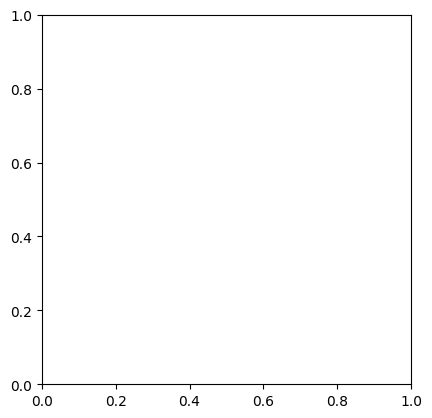

In [183]:
# 1. Euclidean distance (library)
euclidean_distance = torch.nn.PairwiseDistance(p=2)

test_loader = DataLoader(mnist_test, batch_size=64)

print(mnist_test.data.shape)

distances = []
print(len(test_loader))
for i in range(len(test_loader)):
    output = euclidean_distance(test_loader.dataset.data[i].view(1, -1), train_loader.dataset.data[0].view(1, -1))
    distances.append(output)

# for i in range(len(mnist_test.data)):
#     output = euclidean_distance(mnist_test.data[i].view(1, -1), mnist_train.data[0].view(1, -1))
#     distances.append(output)
# output = euclidean_distance(mnist_test.data[0].view(1, -1), mnist_train.data[0].view(1, -1))
# print(output)
distances.sort()
print(distances)
print(len(distances))
# this is a list of distances between batches

#within a batch:
for batch in test_loader:
    #see whats inside a batch
    for sample in batch:
        #print(sample.shape)
        #print('\n')
        print(type(sample))
        plt.imshow(sample[0,2:], cmap='gray')

        


In [ ]:
# 1a. Euclidean distance (your own)


# subtract between test data and each row of training data -> power by 2 -> sum along axis you want to eliminate -> sqrt




In [ ]:
#implement a knn classifier for the MNIST dataset


In [103]:
print(newsgroups_test.data[0])


From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



In [18]:
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [86]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
print(X_train.shape)
print(X_test.shape)



(11314, 130107)
(7532, 130107)


In [ ]:
#For 20NG, try TF normalization on e.g. the rows. Note for text is critical to maintain a sparse format due to large number of columns

